# Detailed Sales Analysis

This notebook provides a comprehensive analysis of sales data across multiple dimensions:
1. Category Analysis
2. Sub-Category Breakdown
3. City-wise Analysis
4. Shipping Patterns
5. Temporal Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
# plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 6]

# Read the cleaned data
df = pd.read_csv('../data/cleaned_sales_data.csv')

# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create temporal features
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Quarter'] = df['Ship Date'].dt.quarter
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Quarter'] = df['Order Date'].dt.quarter

## 1. Category Analysis

Category Performance Analysis:
--------------------------------------------------
                Sales                    Ship Mode
                count    mean        sum     count
Category                                          
Furniture        2078  350.65  728658.58      2078
Office Supplies  5909  119.38  705422.33      5909
Technology       1813  456.40  827455.87      1813


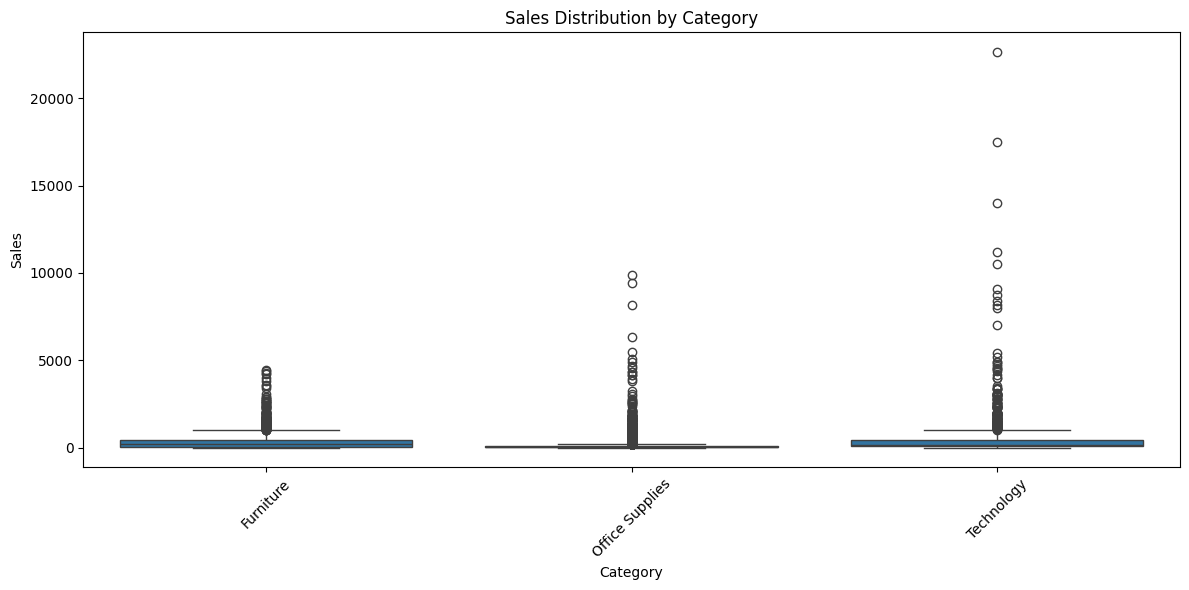

<Figure size 1200x600 with 0 Axes>

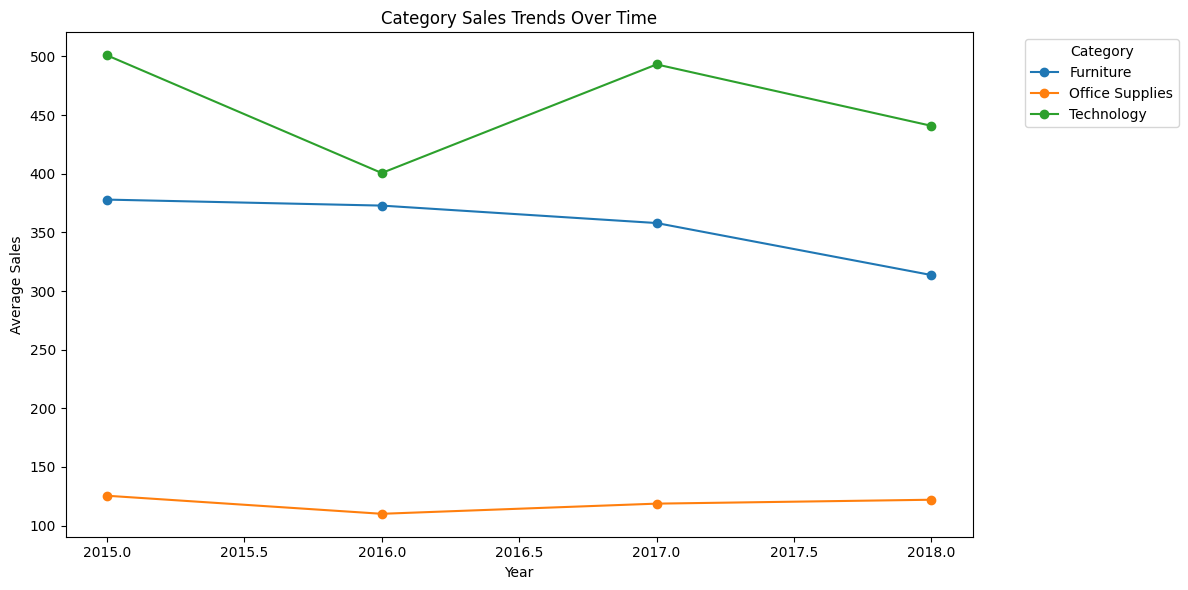

In [2]:
# Category performance analysis
category_analysis = df.groupby('Category').agg({
    'Sales': ['count', 'mean', 'sum'],
    'Ship Mode': 'count'
}).round(2)

print("Category Performance Analysis:")
print("-" * 50)
print(category_analysis)

# Visualize category sales distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Category sales trends over time
category_trends = df.groupby(['Order Year', 'Category'])['Sales'].mean().unstack()
plt.figure(figsize=(12, 6))
category_trends.plot(marker='o')
plt.title('Category Sales Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## 2. Sub-Category Analysis

Top 10 Sub-Categories by Total Sales:
--------------------------------------------------
Category         Sub-Category
Technology       Phones          327782.45
Furniture        Chairs          322822.73
Office Supplies  Storage         219343.39
Furniture        Tables          202810.63
Office Supplies  Binders         200028.78
Technology       Machines        189238.63
                 Accessories     164186.70
                 Copiers         146248.09
Furniture        Bookcases       113813.20
Office Supplies  Appliances      104618.40
Name: sum, dtype: float64


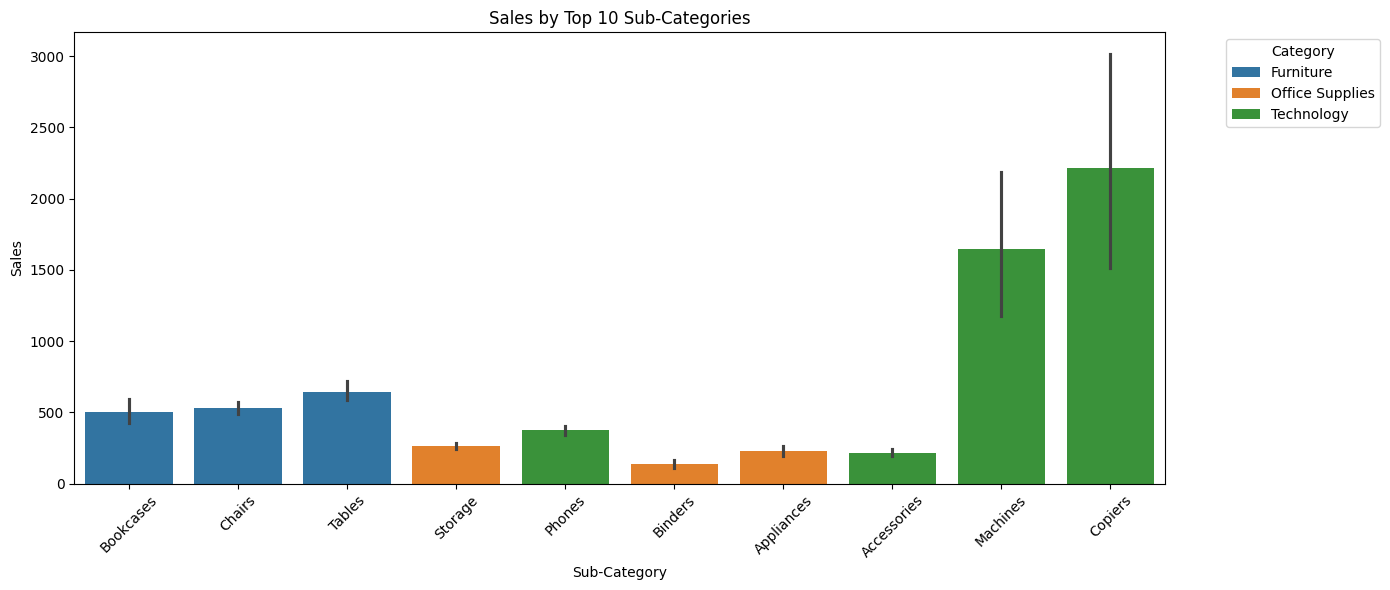

In [3]:
# Top 10 sub-categories by sales
subcategory_analysis = df.groupby(['Category', 'Sub-Category']).agg({
    'Sales': ['count', 'mean', 'sum']
}).round(2)

top_subcategories = subcategory_analysis['Sales']['sum'].sort_values(ascending=False).head(10)

print("Top 10 Sub-Categories by Total Sales:")
print("-" * 50)
print(top_subcategories)

# Visualize top sub-categories
plt.figure(figsize=(14, 6))
sns.barplot(data=df[df['Sub-Category'].isin(top_subcategories.index.get_level_values(1))],
            x='Sub-Category', y='Sales', hue='Category')
plt.title('Sales by Top 10 Sub-Categories')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## 3. City-wise Analysis

Top 15 Cities by Total Sales:
--------------------------------------------------
Region   City         
East     New York City    252462.55
West     Los Angeles      173420.18
         Seattle          116106.32
         San Francisco    109041.12
East     Philadelphia     108841.75
Central  Houston           63956.14
         Chicago           47820.13
West     San Diego         47521.03
South    Jacksonville      44713.18
Central  Detroit           42446.94
East     Newark            28448.05
Central  San Antonio       21843.53
         Dallas            20127.95
         Lafayette         19624.51
South    Atlanta           17197.84
Name: sum, dtype: float64


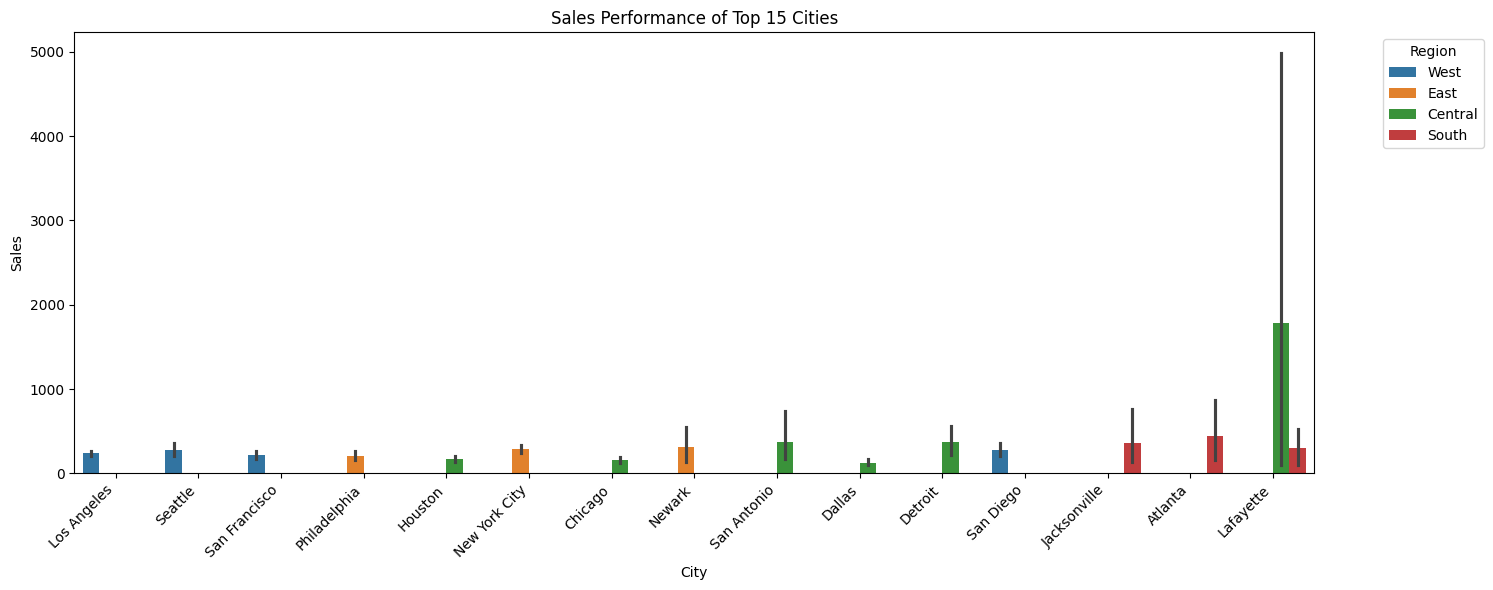

In [4]:
# Top 15 cities by sales volume and revenue
city_analysis = df.groupby(['Region', 'City']).agg({
    'Sales': ['count', 'mean', 'sum'],
    'Order ID': 'count'
}).round(2)

top_cities = city_analysis['Sales']['sum'].sort_values(ascending=False).head(15)

print("Top 15 Cities by Total Sales:")
print("-" * 50)
print(top_cities)

# Visualize city performance
plt.figure(figsize=(15, 6))
city_data = df[df['City'].isin(top_cities.index.get_level_values(1))]
sns.barplot(data=city_data, x='City', y='Sales', hue='Region')
plt.title('Sales Performance of Top 15 Cities')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## 4. Shipping Analysis

Shipping Analysis by Mode:
--------------------------------------------------
               Sales                     Shipping Days        
               count    mean         sum          mean min max
Ship Mode                                                     
First Class     1501  230.23   345572.26          2.18   1   4
Same Day         538  232.75   125219.04          0.04   0   1
Second Class    1902  236.55   449914.18          3.25   1   5
Standard Class  5859  228.85  1340831.31          5.01   3   7


C:\Users\nouha\AppData\Local\Temp\ipykernel_23004\1060956446.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
C:\Users\nouha\AppData\Local\Temp\ipykernel_23004\1060956446.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


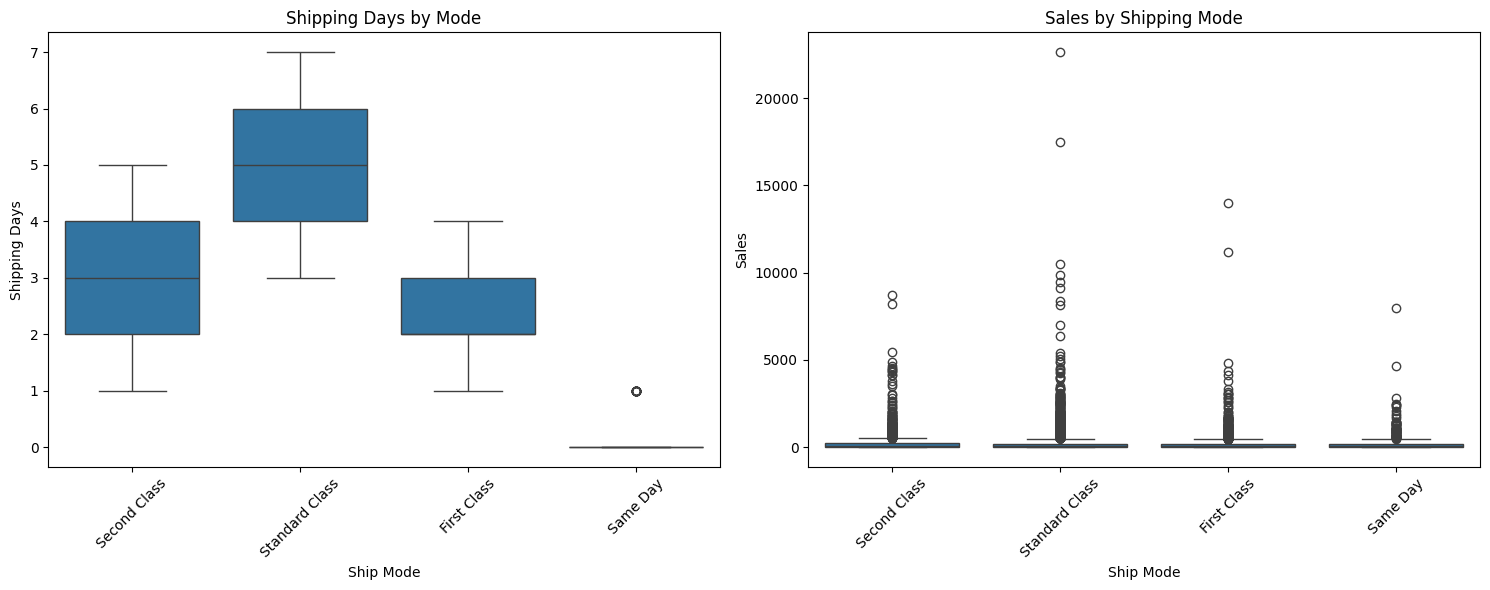

<Figure size 1200x600 with 0 Axes>

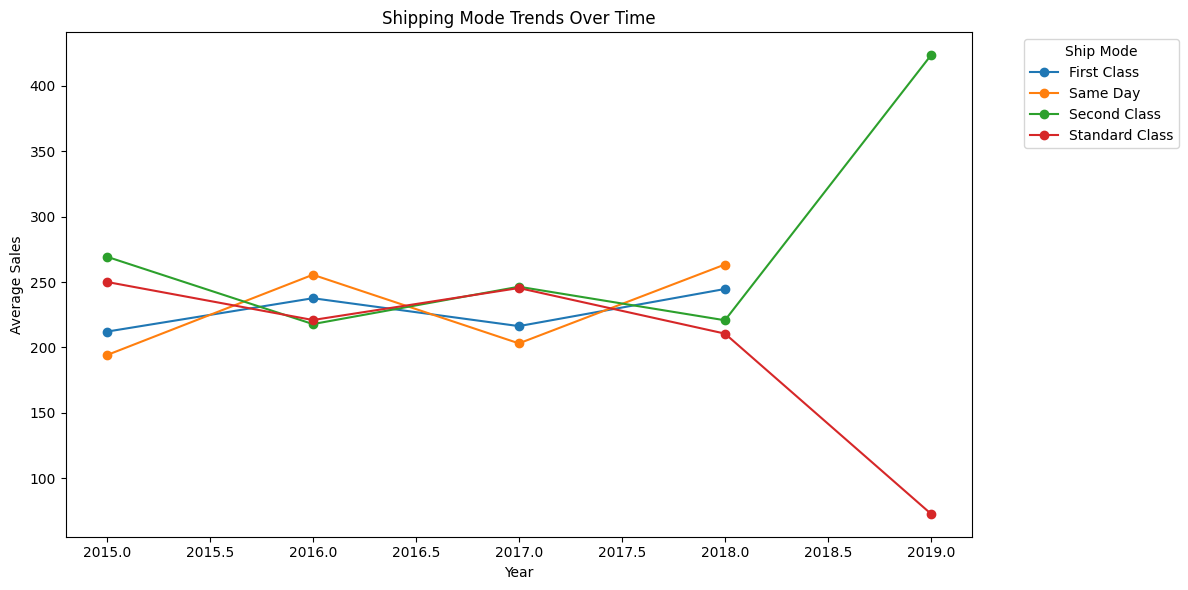

In [5]:
# Shipping mode analysis
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

ship_analysis = df.groupby('Ship Mode').agg({
    'Sales': ['count', 'mean', 'sum'],
    'Shipping Days': ['mean', 'min', 'max']
}).round(2)

print("Shipping Analysis by Mode:")
print("-" * 50)
print(ship_analysis)

# Visualize shipping patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='Ship Mode', y='Shipping Days', data=df, ax=ax1)
ax1.set_title('Shipping Days by Mode')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

sns.boxplot(x='Ship Mode', y='Sales', data=df, ax=ax2)
ax2.set_title('Sales by Shipping Mode')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Shipping trends over time
ship_trends = df.groupby(['Ship Year', 'Ship Mode'])['Sales'].mean().unstack()
plt.figure(figsize=(12, 6))
ship_trends.plot(marker='o')
plt.title('Shipping Mode Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## 5. Temporal Analysis

In [7]:
# # Monthly sales patterns
# monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].mean().reset_index()
# monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Order Year', 'Order Month']].assign(DAY=1))

# plt.figure(figsize=(15, 6))
# plt.plot(monthly_sales['Date'], monthly_sales['Sales'], marker='o')
# plt.title('Monthly Sales Trends')
# plt.xlabel('Date')
# plt.ylabel('Average Sales')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Seasonal patterns
# seasonal = df.groupby('Order Month')['Sales'].mean()
# plt.figure(figsize=(12, 6))
# seasonal.plot(kind='bar')
# plt.title('Seasonal Sales Patterns')
# plt.xlabel('Month')
# plt.ylabel('Average Sales')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Year-over-year growth
# yearly_growth = df.groupby('Order Year')['Sales'].agg(['mean', 'sum']).round(2)
# yearly_growth['YoY Growth'] = yearly_growth['sum'].pct_change() * 100

# print("\nYear-over-Year Growth:")
# print("-" * 50)
# print(yearly_growth)

## 6. Cross-Category Analysis

<Figure size 1200x600 with 0 Axes>

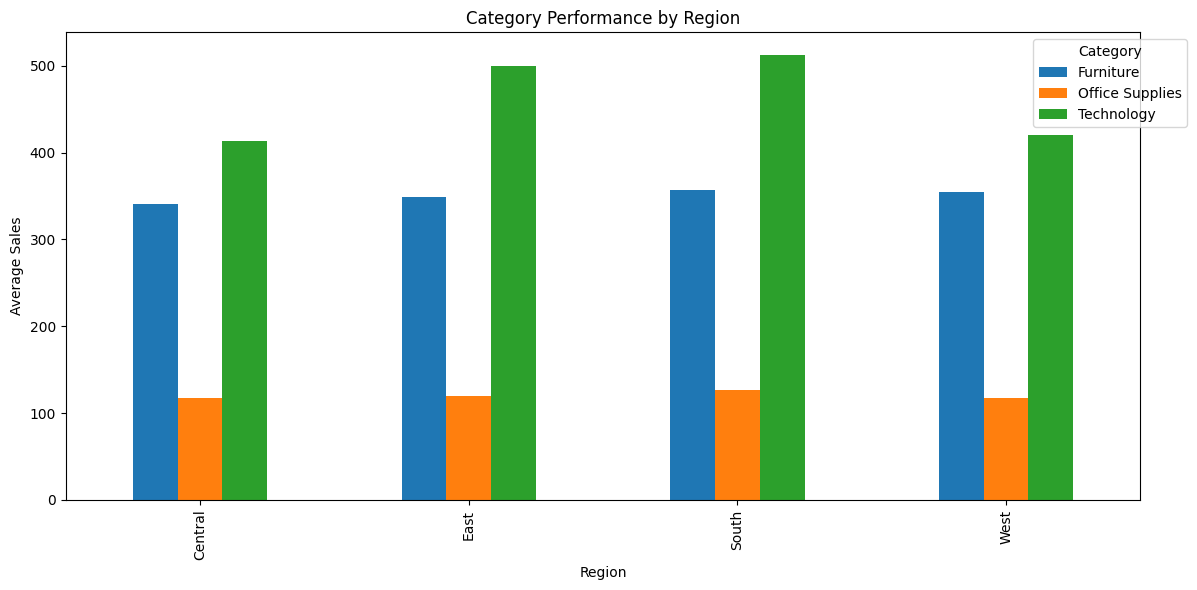

<Figure size 1200x600 with 0 Axes>

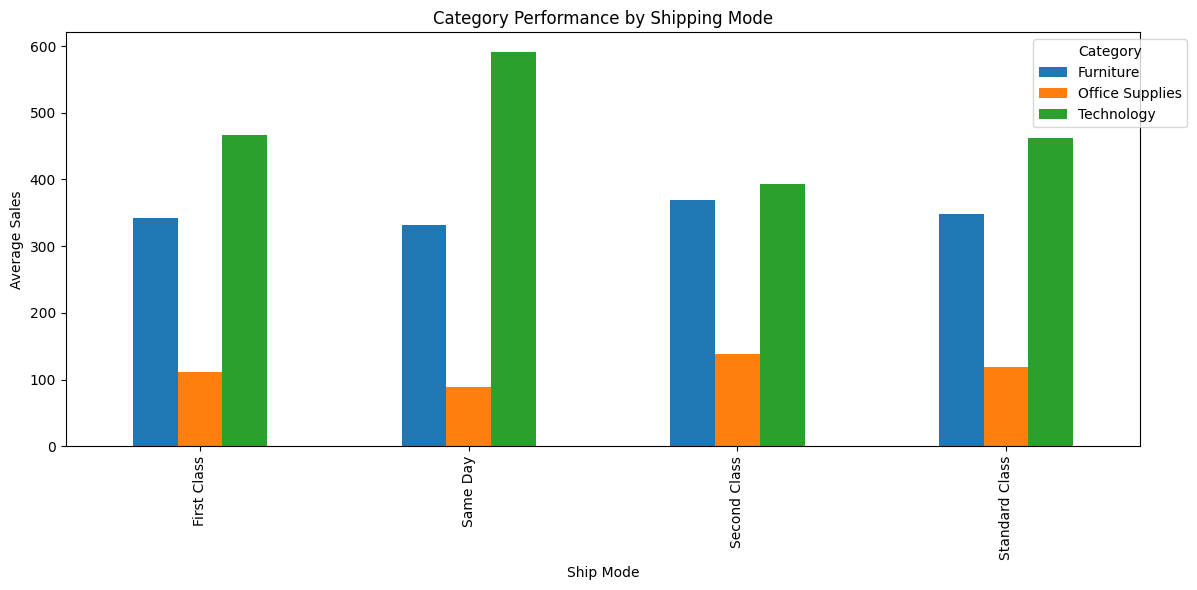

In [8]:
# Category performance by region
region_category = df.groupby(['Region', 'Category'])['Sales'].mean().unstack()
plt.figure(figsize=(12, 6))
region_category.plot(kind='bar')
plt.title('Category Performance by Region')
plt.xlabel('Region')
plt.ylabel('Average Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Category performance by shipping mode
ship_category = df.groupby(['Ship Mode', 'Category'])['Sales'].mean().unstack()
plt.figure(figsize=(12, 6))
ship_category.plot(kind='bar')
plt.title('Category Performance by Shipping Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()